#### BRCA UMAP, setup cells

Adapted from: d_umap_normed_00.ipynb  
Goal is to reduce subtype count and put  
scatter plots in a loop

In [ ]:
# Data
    # raw normed
    /Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure/normed_data/test_norm.tsv
    # decoded
    b_model/decoded/BRCA_10k_outlier_cut_train_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv

In [1]:
%whos

Interactive namespace is empty.


In [6]:
ls ../b_model/decoded/

BLCA_10k_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BLCA_10k_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BLCA_1k_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BLCA_1k_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BLCA_500_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BLCA_500_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_test_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_test_15_epochs_2_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_train_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_train_15_epochs_2_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_fine_tune_10k_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BRCA_fine_tune_10k_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BRCA_fin

In [7]:
import umap.umap_ as umap
import glob as glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [8]:
date = '2022_10_13' # Thursday, BRCA plot
# prep for run 1D model

In [9]:
version = 'd_umap_normed_BRCA.ipynb' # for file name

In [ ]:
# Raw data is normalized full 20,531 features,
# not from 17k feature intersection file set for mass transfer learning

#### Get column headers and unique labels from raw file

In [98]:
# for the raw data, should also just come from a_data structure
gxp_file_paths = sorted(glob.glob('/Users/karlberb/work/sample_count/smpl_gen/gexp_files/*.tsv'))

In [10]:
# indexing makes no sense here
gxp_file_paths = sorted(glob.glob('../b_model/decoded/BRCA_10k_outlier_cut_train_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv'))

In [ ]:
change to have training params vals after names in file name

In [11]:
gxp_file_paths[0]

'../b_model/decoded/BRCA_10k_outlier_cut_train_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv'

In [12]:
file  = pd.read_csv(gxp_file_paths[0], # read bladder
                       sep = '\t',
                       index_col = 0)

In [16]:
file

,0,1,2,3,4,5,6,7,8,9,...,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529
0,0.059041,0.201285,0.171720,0.175925,0.018933,0.081434,0.090191,0.000000,0.017570,0.014514,...,0.306067,0.136860,0.316002,0.158963,0.308214,0.395452,0.180101,0.076777,0.036644,0.016295
1,0.168538,0.276871,0.241487,0.170188,0.000000,0.182744,0.079647,0.046180,0.039592,0.093303,...,0.378605,0.187535,0.394222,0.130547,0.253411,0.267084,0.371329,0.079472,0.212301,0.093712
2,0.111954,0.239479,0.241789,0.121962,0.000000,0.115514,0.081773,0.017225,0.015988,0.014199,...,0.319850,0.196694,0.353620,0.132088,0.336917,0.381783,0.172512,0.068236,0.037713,0.084995
3,0.079368,0.173144,0.142807,0.181250,0.000000,0.145682,0.058551,0.010835,0.002035,0.005977,...,0.341313,0.154689,0.295285,0.209929,0.293272,0.410416,0.178978,0.080601,0.053100,0.039381
4,0.083482,0.188630,0.216589,0.132915,0.015471,0.111117,0.058058,0.006448,0.024672,0.019649,...,0.327062,0.180445,0.302495,0.144747,0.302042,0.318489,0.210451,0.090421,0.135269,0.085747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,0.085366,0.211763,0.176950,0.182847,0.005432,0.178157,0.100933,0.029107,0.010542,0.081143,...,0.358877,0.220470,0.373867,0.159281,0.316707,0.232312,0.207591,0.125081,0.109179,0.077201
742,0.099087,0.138167,0.202273,0.151350,0.014621,0.096302,0.064267,0.002976,0.023268,0.022734,...,0.282576,0.203213,0.292877,0.154165,0.325967,0.355180,0.152026,0.074897,0.042466,0.099906
743,0.079258,0.235764,0.172629,0.129796,0.012859,0.151443,0.137962,0.000000,0.002625,0.176160,...,0.354493,0.134848,0.414741,0.178931,0.408959,0.236278,0.156291,0.092948,0.102625,0.056419
744,0.083608,0.154249,0.165227,0.113555,0.000000,0.112890,0.082764,0.025236,0.009595,0.053213,...,0.285801,0.190735,0.311083,0.193582,0.373273,0.343492,0.144842,0.064151,0.047672,0.035467


In [17]:
file.shape

(746, 20530)

In [ ]:
# lost a gene, should be 531

In [13]:
del(gxp_file_paths)

In [14]:
col_heads = file.columns

In [15]:
col_heads # has Labels

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '20520', '20521', '20522', '20523', '20524', '20525', '20526', '20527',
       '20528', '20529'],
      dtype='object', length=20530)

In [100]:
lbl_lst = sorted(file.Labels.unique())

In [101]:
del(file)

In [ ]:
# Need to save dataframe max val prior to MinMax to put back to gexp space
# Therefore, plot normalized values for now - 

#### General devel

In [9]:
file.Labels.unique() # Six subtypes, automate UMAP plot labeling

array(['BLCA_2', 'BLCA_1', 'BLCA_3', 'BLCA_4', 'BLCA_5', 'BLCA_6'],
      dtype=object)

In [23]:
raw_n = file.copy()

In [ ]:
raw_n

#### Normalized raw read; label and column header add  
also re-labeling for umap

In [39]:
# Train
unit = pd.read_csv(
    '/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure/normed_data/train_norm.tsv',
        sep = '\t',
        index_col = 0)

In [ ]:
unit # identify step in a_data_structure where the columns are stripped

In [40]:
trn_dec_lbls = pd.read_csv('../a_data_structure/blca_brca_flt64_sqrs/MinMax/BLCA_MinMax_y_trn.tsv',
                           sep = '\t',
                           index_col = 0)

In [41]:
unit.insert(0, 'Labels', trn_dec_lbls.Labels)

In [30]:
unit.shape # written prior to zero filling

(299, 20532)

In [ ]:
unit

In [42]:
umap_labels = [] # BLCA, label auto raw, template for any primary with 6 subs
for i in unit.Labels:
    if i == unit.Labels.unique()[0]:
        umap_labels.append(unit.Labels.unique()[0]+'_train_raw')
    if i == unit.Labels.unique()[1]:
        umap_labels.append(unit.Labels.unique()[1]+'_train_raw')
    if i == unit.Labels.unique()[2]:
        umap_labels.append(unit.Labels.unique()[2]+'_train_raw')
    if i == unit.Labels.unique()[3]:
        umap_labels.append(unit.Labels.unique()[3]+'_train_raw')
    if i == unit.Labels.unique()[4]:
        umap_labels.append(unit.Labels.unique()[4]+'_train_raw')
    if i == unit.Labels.unique()[5]:
        umap_labels.append(unit.Labels.unique()[5]+'_train_raw')
unit.Labels = umap_labels

In [ ]:
unit

In [43]:
nrm_raw_trn = unit

In [44]:
# Test
unit = pd.read_csv(
    '/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure/normed_data/test_norm.tsv',
        sep = '\t',
        index_col = 0)

In [45]:
tst_dec_lbls = pd.read_csv('../a_data_structure/blca_brca_flt64_sqrs/MinMax/BLCA_MinMax_y_tst.tsv',
                           sep = '\t',
                           index_col = 0)

In [46]:
unit.insert(0, 'Labels', tst_dec_lbls.Labels)

In [47]:
umap_labels = [] # BLCA, label auto raw, template for any primary with 6 subs
for i in unit.Labels:
    if i == unit.Labels.unique()[0]:
        umap_labels.append(unit.Labels.unique()[0]+'_test_raw')
    if i == unit.Labels.unique()[1]:
        umap_labels.append(unit.Labels.unique()[1]+'_test_raw')
    if i == unit.Labels.unique()[2]:
        umap_labels.append(unit.Labels.unique()[2]+'_test_raw')
    if i == unit.Labels.unique()[3]:
        umap_labels.append(unit.Labels.unique()[3]+'_test_raw')
    if i == unit.Labels.unique()[4]:
        umap_labels.append(unit.Labels.unique()[4]+'_test_raw')
    if i == unit.Labels.unique()[5]:
        umap_labels.append(unit.Labels.unique()[5]+'_test_raw')
unit.Labels = umap_labels

In [48]:
nrm_raw_tst = unit

In [ ]:
# light colors are even numbers, first set of color pairs
    # decoded samples as light colors, train as circles, test as triangles

# dark colors are odd numbers, second in color pairs
    # normalized raw as dark colors, train as circles, test as triangles

In [ ]:
# Raw BLCA labeled, get the inverse for the decoded samples (this is in raw gexp space)
    # not necassary now that using the normalized raw data

In [ ]:
https://stackoverflow.com/questions/41551165/invert-minmaxscaler-from-scikit-learn
scaler.inverse_transform(scaled_data)
# Go the VAE and get the full sample set of decoded BLCA

#### Decoded sample read and flatten

In [ ]:
# Yes, need to redo for normed_00

In [51]:
decod_trn = np.load(
    '../b_model/dec_out_ignrd/BLCA, float.64, MinMax_2022-10-11_decoded_train.npy')

In [52]:
decod_tst = np.load(
    '../b_model/dec_out_ignrd/BLCA, float.64, MinMax_2022-10-11_decoded_test.npy')

In [ ]:
# steps: flatten the array
    # run on the normalized raw data to avoid inverse norming the dec samples now - 
    # in process, this version

In [54]:
decod_trn.shape # This is MinMax normed decoded, make flat

(299, 144, 144, 1)

In [56]:
len(decod_trn[0].flatten()) # need to strip zeros

20736

In [ ]:
# devel for loop, loc with one arg sets a row
df.loc[len(df.index)] = list(i.flatten())

In [57]:
df = pd.DataFrame(columns = list(range(0,len(list(decod_trn[0].flatten())))))

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735


In [59]:
for i in decod_trn: # Train frame build, this is a flattening function
    df.loc[len(df.index)] = list(i.flatten())
    # break

In [60]:
decod_trn = df.copy()

In [65]:
decod_trn.shape

(299, 20736)

In [64]:
decod_tst.shape

(100, 144, 144, 1)

In [67]:
df = pd.DataFrame(columns = list(range(0,len(list(decod_tst[0].flatten())))))
for i in decod_tst: # Test frame build, label and column install after flatten
    df.loc[len(df.index)] = list(i.flatten())
decod_tst = df.copy()

In [68]:
del(df)

In [69]:
del(df_tst)

In [ ]:
# run the inverse function on both the train and the test here to put
# all the way back to gene space

In [ ]:
# method overview
# need to apply the scaling to the train then the test sequentially
    # This would be in the data strucure section, a_
# need to reverse this 

#### Devel flatten notes

In [ ]:
# step in for normed raw after this step

In [40]:
i.shape

(144, 144, 1)

In [41]:
i.flatten

<function ndarray.flatten>

In [ ]:
list(i.flatten())

In [49]:
[i.flatten()]

[array([0.07197528, 0.22017251, 0.3071778 , ..., 0.00995339, 0.00097492,
        0.00885297], dtype=float32)]

In [42]:
i.flatten()

array([0.07197528, 0.22017251, 0.3071778 , ..., 0.00995339, 0.00097492,
       0.00885297], dtype=float32)

In [43]:
i.flatten().shape

(20736,)

In [44]:
type(i.flatten().shape) # the shape is a tuple, not the array

tuple

In [45]:
i.flatten()[0]

0.071975276

In [46]:
type(i.flatten())

numpy.ndarray

#### inverse_MinMax

In [ ]:
# Is there a corresponding two-stage process
    # for the fit_transform, then transform

#### Resume UMAP devel

In [ ]:
BLCA float64 UMAP stack, v00

#### Subtype labels and columns added back to decoded samples
Cut zero columns, variable name change

In [69]:
ls ..

README.md          c_latent_sampling/ e_classification/
a_data_structure/  cvae_venv/         f_archive/
b_model/           d_UMAP/            g_devel/


In [ ]:
# Can consolidate the Label install on the decoded samples with the normed raw

In [82]:
# to decod_trn
trn_dec_lbls = pd.read_csv('../a_data_structure/blca_brca_flt64_sqrs/MinMax/BLCA_MinMax_y_trn.tsv',
                           sep = '\t',
                           index_col = 0)

In [83]:
tst_dec_lbls = pd.read_csv('../a_data_structure/blca_brca_flt64_sqrs/MinMax/BLCA_MinMax_y_tst.tsv',
                           sep = '\t',
                           index_col = 0)

In [ ]:
tst_dec_lbls

In [77]:
decod_trn.insert(0, 'Labels', trn_dec_lbls.Labels)

In [89]:
decod_trn.shape

(299, 20737)

In [78]:
decod_tst.insert(0, 'Labels', tst_dec_lbls.Labels)

In [88]:
decod_tst.shape # time to cut zeros

(100, 20737)

In [ ]:
# 20,532 includes the Label column

In [90]:
decod_trn_cut = decod_trn.iloc[:, :20532] # looks pretty good

In [91]:
decod_tst_cut = decod_tst.iloc[:, :20532]

In [116]:
decod_tst.shape

(100, 20737)

In [117]:
decod_tst_cut.shape # Variable name error, to concat stacking zone

(100, 20532)

In [93]:
decod_trn_cut.columns = col_heads

In [94]:
decod_tst_cut.columns = col_heads

#### Cut zeros

In [ ]:
# above

#### Column and label inspections

In [ ]:
# inspection slice, to devel notes
df_trn.iloc[:, 20528:20536]

In [ ]:
# want to concat
# need columns to concat
# need to slice and drop zero cols to get the columns on

#### Label mods for decoded samples, UMAP  
from template blocks below, need six - block for BLCA
* automate this step to be subtype-count agnostic

In [102]:
lbl_lst

['BLCA_1', 'BLCA_2', 'BLCA_3', 'BLCA_4', 'BLCA_5', 'BLCA_6']

#### Train set decoded relabel

In [95]:
trn_tst_set = 'train'

In [103]:
umap_labels = [] # BLCA_dec, read from model version 2 output
for i in decod_trn_cut.Labels:
    if i == lbl_lst[0]:
        umap_labels.append(lbl_lst[0]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[1]:
        umap_labels.append(lbl_lst[1]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[2]:
        umap_labels.append(lbl_lst[2]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[3]:
        umap_labels.append(lbl_lst[3]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[4]:
        umap_labels.append(lbl_lst[4]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[5]:
        umap_labels.append(lbl_lst[5]+'_'+trn_tst_set+'_decoded')
decod_trn_cut.Labels = umap_labels

#### Test set decoded relabel

In [104]:
trn_tst_set = 'test'

In [ ]:
lbl_lst

In [105]:
umap_labels = [] # BLCA_dec, read from model version 2 output
for i in decod_tst_cut.Labels:
    if i == lbl_lst[0]:
        umap_labels.append(lbl_lst[0]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[1]:
        umap_labels.append(lbl_lst[1]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[2]:
        umap_labels.append(lbl_lst[2]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[3]:
        umap_labels.append(lbl_lst[3]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[4]:
        umap_labels.append(lbl_lst[4]+'_'+trn_tst_set+'_decoded')
    if i == lbl_lst[5]:
        umap_labels.append(lbl_lst[5]+'_'+trn_tst_set+'_decoded')
decod_tst_cut.Labels = umap_labels

In [106]:
decod_tst_cut

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
0,BLCA_1_test_decoded,0.072328,0.127542,0.184995,0.392218,0.145170,0.029241,0.126573,0.066299,0.077447,...,0.362772,0.196995,0.165045,0.072829,0.245528,0.498143,0.189962,0.152691,0.031110,0.030984
1,BLCA_2_test_decoded,0.078728,0.174069,0.250860,0.244179,0.224514,0.016453,0.108669,0.148421,0.069964,...,0.143783,0.139229,0.195271,0.026308,0.171041,0.238253,0.172104,0.039849,0.051891,0.003760
2,BLCA_1_test_decoded,0.077465,0.160421,0.215225,0.346104,0.171087,0.026541,0.120333,0.096916,0.078194,...,0.299268,0.201798,0.211242,0.055052,0.249683,0.383828,0.207879,0.102618,0.040221,0.016215
3,BLCA_1_test_decoded,0.057488,0.138257,0.192661,0.354997,0.133912,0.017306,0.096623,0.064002,0.057427,...,0.313807,0.186714,0.196737,0.043132,0.238466,0.396260,0.181082,0.116049,0.027563,0.011541
4,BLCA_2_test_decoded,0.095813,0.213856,0.278136,0.306420,0.205609,0.025721,0.135871,0.136134,0.087764,...,0.261601,0.213692,0.256863,0.049955,0.285190,0.285934,0.234987,0.089368,0.060051,0.011674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BLCA_5_test_decoded,0.085246,0.226576,0.300975,0.298404,0.189063,0.020079,0.124486,0.129840,0.068367,...,0.267582,0.219069,0.285150,0.046411,0.324342,0.227240,0.241541,0.083926,0.052400,0.008841
96,BLCA_3_test_decoded,0.077836,0.215259,0.281951,0.279957,0.192045,0.017069,0.117643,0.126523,0.062321,...,0.244571,0.197332,0.257124,0.037257,0.297882,0.222657,0.228219,0.072514,0.048490,0.005912
97,BLCA_3_test_decoded,0.089532,0.256466,0.319189,0.346839,0.167354,0.022716,0.136471,0.114095,0.070482,...,0.355625,0.265915,0.307015,0.058990,0.405068,0.239128,0.270865,0.137900,0.047045,0.015573
98,BLCA_1_test_decoded,0.078544,0.163384,0.225810,0.305557,0.187869,0.021976,0.113962,0.110390,0.074631,...,0.226122,0.179306,0.205778,0.044250,0.218913,0.330399,0.190485,0.075801,0.045377,0.009294


#### Raw sample relabel

In [105]:
lbl_set = 'raw'

In [108]:
umap_labels = [] # BLCA_dec, read from model version 2 output
for i in file.Labels:
    if i == sorted(file.Labels.unique())[0]:
        umap_labels.append(sorted(file.Labels.unique())[0]+'_'+lbl_set)
    if i == sorted(file.Labels.unique())[1]:
        umap_labels.append(sorted(file.Labels.unique())[1]+'_'+lbl_set)
    if i == sorted(file.Labels.unique())[2]:
        umap_labels.append(sorted(file.Labels.unique())[2]+'_'+lbl_set)
    if i == sorted(file.Labels.unique())[3]:
        umap_labels.append(sorted(file.Labels.unique())[3]+'_'+lbl_set)
    if i == sorted(file.Labels.unique())[4]:
        umap_labels.append(sorted(file.Labels.unique())[4]+'_'+lbl_set)
    if i == sorted(file.Labels.unique())[5]:
        umap_labels.append(sorted(file.Labels.unique())[5]+'_'+lbl_set)
file.Labels = umap_labels

In [ ]:
* replace with raw_n

#### Stacking ops

In [ ]:
List of objects to stack:
    nrm_raw_trn
    nrm_raw_tst
    decod_tst
    decod_trn

In [111]:
nrm_raw_trn.shape

(299, 20532)

In [112]:
nrm_raw_tst.shape

(100, 20532)

In [113]:
decod_tst.shape # fail, cut zeros, this is decod test

# Trace back to zero-cut zone, decod test

(100, 20737)

In [ ]:
decod_tst_cut

In [119]:
full_stack = pd.concat([nrm_raw_trn,
                        nrm_raw_tst,
                        decod_tst_cut,
                        decod_trn_cut])

# Now the UMAP is getting no zero-filler columns
# The data types are float

In [ ]:
# List of optimizations:
    Batch size
    Data type
    Layer count
    Filter count
    Epochs
    Pre-training scheme
    Latent dimension
    
    Paired colormap for 7-subtype cohorts
    
# Core functioinality:
    Two architechtures (defined by Layer-type)
    Automated UMAP (defined by taking arbitrary number of subtypes)

In [ ]:
# want repeats in index

In [120]:
full_stack.shape

(798, 20532)

In [123]:
full_stack.head(1)

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
0,BLCA_2_train_raw,0.0,0.0,0.060688,0.190093,0.120877,0.0,0.064528,0.0,0.0,...,0.167245,0.226274,0.219092,0.014614,0.376986,0.140468,0.135513,0.186737,0.009614,0.040715


In [125]:
len(full_stack.Labels.unique()) #check

24

#### UMAP function

In [121]:
n_comps = 2
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(full_stack.iloc[:,1:])
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(full_stack.Labels))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


#### Raw / dec UMAP

In [129]:
embdDF # looks at least in the ball park

,Labels,x,y
0,BLCA_2_train_raw,9.810587,3.422034
1,BLCA_3_train_raw,5.442807,4.001378
2,BLCA_1_train_raw,8.980364,3.815397
3,BLCA_4_train_raw,8.594315,5.229689
4,BLCA_2_train_raw,5.889168,1.035568
...,...,...,...
793,BLCA_3_train_decoded,6.536886,5.756028
794,BLCA_1_train_decoded,7.293661,0.075339
795,BLCA_1_train_decoded,6.953939,1.934811
796,BLCA_1_train_decoded,6.947011,5.516231


In [124]:
full_stack.Labels.unique()

array(['BLCA_2_train_raw', 'BLCA_3_train_raw', 'BLCA_1_train_raw',
       'BLCA_4_train_raw', 'BLCA_5_train_raw', 'BLCA_6_train_raw',
       'BLCA_1_test_raw', 'BLCA_2_test_raw', 'BLCA_6_test_raw',
       'BLCA_4_test_raw', 'BLCA_3_test_raw', 'BLCA_5_test_raw',
       'BLCA_1_test_decoded', 'BLCA_2_test_decoded',
       'BLCA_6_test_decoded', 'BLCA_4_test_decoded',
       'BLCA_3_test_decoded', 'BLCA_5_test_decoded',
       'BLCA_2_train_decoded', 'BLCA_3_train_decoded',
       'BLCA_1_train_decoded', 'BLCA_4_train_decoded',
       'BLCA_5_train_decoded', 'BLCA_6_train_decoded'], dtype=object)

In [ ]:
# BRCA will be 16,
    # ideas to automate
    # sort to leverage alphabetic properties (?)
        # should be robust across cancers because primary type is first in Label
    # will need to run in loop by subtype - 4 plots per loop repeat
        # because the number of plots per primary type differs
        # get subtype number, position 1 in string split to start
    
    # automating markers should be no problem
    
    # Plan ahead to incorporate synthetic samples as well
        # just swap out a shape / color with train / test, raw / decoded, etc

In [130]:
sorted(full_stack.Labels.unique()) # test comes before train alphabetically,

# opposite of feed sequence to model; sets label on plot

['BLCA_1_test_decoded',
 'BLCA_1_test_raw',
 'BLCA_1_train_decoded',
 'BLCA_1_train_raw',
 'BLCA_2_test_decoded',
 'BLCA_2_test_raw',
 'BLCA_2_train_decoded',
 'BLCA_2_train_raw',
 'BLCA_3_test_decoded',
 'BLCA_3_test_raw',
 'BLCA_3_train_decoded',
 'BLCA_3_train_raw',
 'BLCA_4_test_decoded',
 'BLCA_4_test_raw',
 'BLCA_4_train_decoded',
 'BLCA_4_train_raw',
 'BLCA_5_test_decoded',
 'BLCA_5_test_raw',
 'BLCA_5_train_decoded',
 'BLCA_5_train_raw',
 'BLCA_6_test_decoded',
 'BLCA_6_test_raw',
 'BLCA_6_train_decoded',
 'BLCA_6_train_raw']

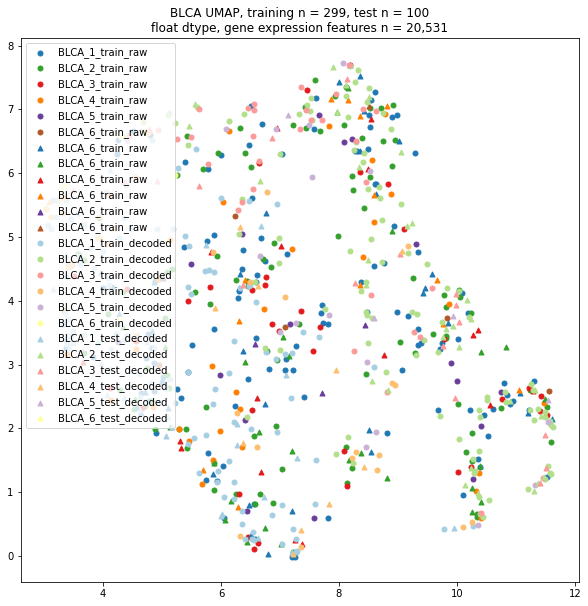

In [134]:
# Raw and decoded BLCA, last manual version, order as tst dc/rw, trn dc/rw next
dot_size = 25

fig = plt.figure(figsize = (10, 10))

# 24 scatter plots

# raw first; train first

train_raw = 'BLCA_1_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='o', label = train_raw)

train_raw = 'BLCA_2_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='o', label = train_raw)

train_raw = 'BLCA_3_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='o', label = train_raw)

train_raw = 'BLCA_4_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='o', label = train_raw)

train_raw = 'BLCA_5_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(9),
            marker='o', label = train_raw)

train_raw = 'BLCA_6_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(11),
            marker='o', label = train_raw)

# raw test blocks
test_raw = 'BLCA_1_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='^', label = train_raw)

test_raw = 'BLCA_2_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='^', label = train_raw)

test_raw = 'BLCA_3_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='^', label = train_raw)

test_raw = 'BLCA_4_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='^', label = train_raw)

test_raw = 'BLCA_5_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(9),
            marker='^', label = train_raw)

test_raw = 'BLCA_6_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(11),
            marker='^', label = train_raw)

# Train decoded block
plt.scatter(embdDF[embdDF.Labels == 'BLCA_1_train_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_1_train_decoded'].y,
            s=dot_size, color=plt.cm.Paired(0), marker='o',
            label = 'BLCA_1_train_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_2_train_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_2_train_decoded'].y,
            s=dot_size, color=plt.cm.Paired(2), marker='o',
            label = 'BLCA_2_train_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_3_train_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_3_train_decoded'].y,
            s=dot_size, color=plt.cm.Paired(4), marker='o',
            label = 'BLCA_3_train_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_4_train_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_4_train_decoded'].y,
            s=dot_size, color=plt.cm.Paired(6), marker='o',
            label = 'BLCA_4_train_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_5_train_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_5_train_decoded'].y,
            s=dot_size, color=plt.cm.Paired(8), marker='o',
            label = 'BLCA_5_train_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_6_train_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_6_train_decoded'].y,
            s=dot_size, color=plt.cm.Paired(10), marker='o',
            label = 'BLCA_6_train_decoded')

# Test decoded block

plt.scatter(embdDF[embdDF.Labels == 'BLCA_1_test_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_1_test_decoded'].y,
            s=dot_size, color=plt.cm.Paired(0), marker='^',
            label = 'BLCA_1_test_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_2_test_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_2_test_decoded'].y,
            s=dot_size, color=plt.cm.Paired(2), marker='^',
            label = 'BLCA_2_test_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_3_test_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_3_test_decoded'].y,
            s=dot_size, color=plt.cm.Paired(4), marker='^',
            label = 'BLCA_3_test_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_4_test_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_4_test_decoded'].y,
            s=dot_size, color=plt.cm.Paired(6), marker='^',
            label = 'BLCA_4_test_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_5_test_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_5_test_decoded'].y,
            s=dot_size, color=plt.cm.Paired(8), marker='^',
            label = 'BLCA_5_test_decoded')

plt.scatter(embdDF[embdDF.Labels == 'BLCA_6_test_decoded'].x,
            embdDF[embdDF.Labels == 'BLCA_6_test_decoded'].y,
            s=dot_size, color=plt.cm.Paired(10), marker='^',
            label = 'BLCA_6_test_decoded')

plt.title('BLCA UMAP, training n = 299, test n = 100\n'+
    # 'synthetic n = 995\n'+
    'float dtype, gene expression features n = 20,531')
          
plt.legend(loc = 'upper left')
plt.savefig('out/'+
            'BLCA_float64_full_gexp_'+version+'_'+date+'_r1.png')

In [131]:
date

'2022_10_12'

In [124]:
version

'nb_D_UMAP_fnctn_plot_02.ipynb'

In [123]:
pwd

'/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/d_UMAP'

In [ ]:
# End

# conclusion notes:
# correct architechture in 2D model, from original
# MNIST medium example

# Devel notes

In [127]:
x = 1

In [128]:
y = x + 1

In [ ]:
# End mardown test

#### Install umap.UMAP

In [116]:
pip uninstall umap

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap-0.1.1.dist-info/*
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/*
  Would not remove (might be manually added):
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/__pycache__/layouts.rdist-30.py39.1.nbc
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/__pycache__/layouts.rdist-30.py39.2.nbc
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/__pycache__/layouts.rdist-30.py39.nbi
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/aligned_umap.py
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/distances.py
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/layouts.py
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/parametric_umap.py
    /Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/umap/plot.p

In [ ]:
https://stackoverflow.com/questions/57242208/how-to-resolve-the-error-module-umap-has-no-attribute-umap-i-tried-installi

In [118]:
import umap.umap_ as umap

#### Continue devel notes

In [ ]:
new_labels = [] # BLCA_dec, read from model version 2 output
for i in train_dec.Labels:
    if i == 'BlCA_1':
        new_labels.append('BRCA_1_decoded') # h is for hold out
    if i == 'BLCA_2':
        new_labels.append('BRCA_2_decoded')
    if i == 'BLCA_3':
        new_labels.append('BRCA_3_decoded')
    if i == 'BLCA_4':
        new_labels.append('BLCA_4_decoded')
    if i == file.Labels.unique()[4]:
        new_labels.append(file.Labels.unique()[4]+'_decoded')
    if i == file.Labels.unique()[5]:
        new_labels.append(file.Labels.unique()[5]+'_decoded')
train_dec.Labels = new_labels

In [ ]:
to_umap = pd.concat(
    [orig, train_dec])

In [ ]:
new_labels = [] # BRCA
for i in train_dec.Labels:
    if i == 'BRCA_1':
        new_labels.append('BRCA_1_decoded') # h is for hold out
    if i == 'BRCA_2':
        new_labels.append('BRCA_2_decoded')
    if i == 'BRCA_3':
        new_labels.append('BRCA_3_decoded')
    if i == 'BRCA_4':
        new_labels.append('BRCA_4_decoded')
train_dec.Labels = new_labels

In [ ]:
# Original notes, from a previous version

In [ ]:
# embDF is from the UMAP whereas encDF is from the VAE
# encDF is latent space whereas embDF could be output from the UMAP function that is either based on
# precoded (unencoded), encoded, or decoded

In [62]:
new_labels = [] # for shapes and colors on plot
for i in train_dec.Labels:
    if i == 'BRCA_1':
        new_labels.append('BRCA_1_decoded') # h is for hold out
    if i == 'BRCA_2':
        new_labels.append('BRCA_2_decoded')
    if i == 'BRCA_3':
        new_labels.append('BRCA_3_decoded')
    if i == 'BRCA_4':
        new_labels.append('BRCA_4_decoded')
train_dec.Labels = new_labels

In [63]:
train_dec.columns = orig.columns

#### Concat here, run UMAP calc after

In [ ]:
# order of ops:
    # unint 8 con

In [64]:
to_umap = pd.concat(
    [orig, train_dec])

In [65]:
to_umap.shape

(1741, 20532)

In [37]:
1741 - 995 # check, good, to plot

746

In [66]:
n_comps = 2
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(to_umap.iloc[:,1:]) # colmn index here
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(to_umap.Labels))

In [ ]:
# Run the UMAP calculation function after the concat

In [122]:
plt.cm.Paired(0)

(0.6509803921568628, 0.807843137254902, 0.8901960784313725, 1.0)

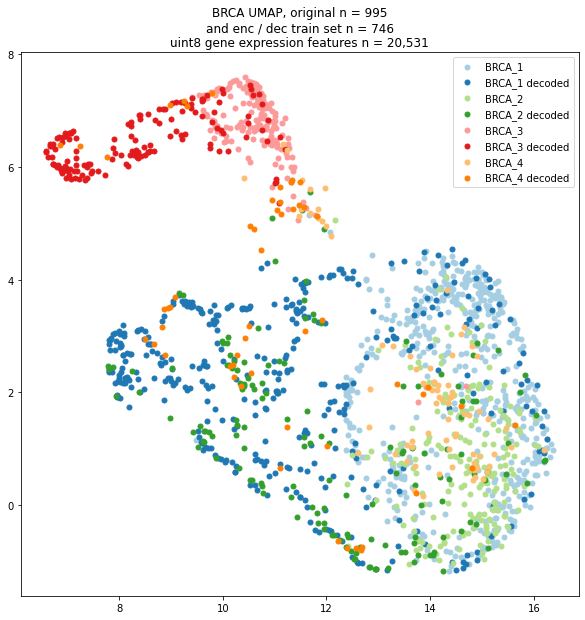

In [70]:
# Template to mod for orig enc / dec plot; x and y inserted by mapping function
dot_size = 25

fig = plt.figure(figsize = (10, 10))

plt.scatter(embdDF[embdDF.Labels == 'BRCA_1'].x, embdDF[embdDF.Labels == 'BRCA_1'].y,
            s=dot_size, color=plt.cm.Paired(0), marker='o', label = 'BRCA_1')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_decoded'].x, embdDF[embdDF.Labels == 'BRCA_1_decoded'].y,
            s=dot_size, color=plt.cm.Paired(1), marker='o', label = 'BRCA_1 decoded')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2'].x, embdDF[embdDF.Labels == 'BRCA_2'].y,
            s=dot_size, color=plt.cm.Paired(2), marker='o', label = 'BRCA_2')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_decoded'].x, embdDF[embdDF.Labels == 'BRCA_2_decoded'].y,
            s=dot_size, color=plt.cm.Paired(3), marker='o', label = 'BRCA_2 decoded')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3'].x, embdDF[embdDF.Labels == 'BRCA_3'].y,
            s=dot_size, color=plt.cm.Paired(4), marker='o', label = 'BRCA_3')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_decoded'].x, embdDF[embdDF.Labels == 'BRCA_3_decoded'].y,
            s=dot_size, color=plt.cm.Paired(5), marker='o', label = 'BRCA_3 decoded')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4'].x, embdDF[embdDF.Labels == 'BRCA_4'].y,
            s=dot_size, color=plt.cm.Paired(6), marker='o', label = 'BRCA_4')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_decoded'].x, embdDF[embdDF.Labels == 'BRCA_4_decoded'].y,
            s=dot_size, color=plt.cm.Paired(7), marker='o', label = 'BRCA_4 decoded')

plt.title('BRCA UMAP, original n = 995\nand enc / dec train set'+
    ' n = 746\n'+
    'uint8 gene expression features n = 20,531')
          
plt.legend(loc = 'upper right')
plt.savefig('nb_D_UMAP_out/'+
            'BRCA_org_&_dec_enc_'+version+'_'+date+'.png')

In [ ]:
# End image_gen notebook

In [32]:
to_umap.head(2)

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA-3C-AAAU,BRCA_1,0.0,16.0,12.0,52.0,152.0,0.0,163.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3C-AALI,BRCA_4,0.0,9.0,17.0,69.0,51.0,0.0,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### version 00 notes:

This has the triangle markers

In [2]:
# output of the pairwise synth vs the real, reference note from version 00
stack_1990 = pd.read_csv('synth_VAE_UMAP_00/full_stack_synth_VAE_UMAP_00__2022_08_31.tsv',
                           sep = '\t',
                           index_col = 0)

/Users/karlberb/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# figure 2b(?)

In [ ]:
# run calc, from 2B in
# the function wants labels

In [5]:
n_comps = 2
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(stack_1990.iloc[:,1:]) # colmn index here
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(stack_1990.Labels))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
# There will only be a Fig 3a now because an embedding has not been done for the PAM50 yet
# but where would this go?
    # bnb_b_modl_out

In [6]:
mkdir bnb_b_modl_out # for PAM50 run into embedding

In [25]:
version = 'run2'

In [ ]:
# Fig 3a, train and hold out plus synthetic predictions, full gexp - 
dot_size = 25

fig = plt.figure(figsize = (10, 10))

plt.scatter(embdDF[embdDF.Labels == 'BRCA_1'].x, embdDF[embdDF.Labels == 'BRCA_1'].y,
            s=dot_size, color=plt.cm.Paired(0), marker='o', label = 'BRCA_1')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_1h'].x, embdDF[embdDF.Labels == 'BRCA_1h'].y,
            s=dot_size, color=plt.cm.Paired(1), marker='o', label = 'BRCA_1 hold out')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2'].x, embdDF[embdDF.Labels == 'BRCA_2'].y,
            s=dot_size, color=plt.cm.Paired(2), marker='o', label = 'BRCA_2')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2h'].x, embdDF[embdDF.Labels == 'BRCA_2h'].y,
            s=dot_size, color=plt.cm.Paired(3), marker='o', label = 'BRCA_2 hold out')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3'].x, embdDF[embdDF.Labels == 'BRCA_3'].y,
            s=dot_size, color=plt.cm.Paired(4), marker='o', label = 'BRCA_3')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3h'].x, embdDF[embdDF.Labels == 'BRCA_3h'].y,
            s=dot_size, color=plt.cm.Paired(5), marker='o', label = 'BRCA_3 hold out')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4'].x, embdDF[embdDF.Labels == 'BRCA_4'].y,
            s=dot_size, color=plt.cm.Paired(6), marker='o', label = 'BRCA_4')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4h'].x, embdDF[embdDF.Labels == 'BRCA_4h'].y,
            s=dot_size, color=plt.cm.Paired(7), marker='o', label = 'BRCA_4 hold out')

# ----------------- Sythetic zone

plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_synth'].x, embdDF[embdDF.Labels == 'BRCA_1_synth'].y,
            s=dot_size, color=plt.cm.Paired(0), marker='^', label = 'BRCA_1 synthetic')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_synth'].x, embdDF[embdDF.Labels == 'BRCA_2_synth'].y,
            s=dot_size, color=plt.cm.Paired(2), marker='^', label = 'BRCA_2 synthetic')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_synth'].x, embdDF[embdDF.Labels == 'BRCA_3_synth'].y,
            s=dot_size, color=plt.cm.Paired(4), marker='^', label = 'BRCA_3 synthetic')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_synth'].x, embdDF[embdDF.Labels == 'BRCA_4_synth'].y,
            s=dot_size, color=plt.cm.Paired(6), marker='^', label = 'BRCA_4 synthetic')

plt.title('BRCA UMAP, training n = 495 and holdout n = 500\n'+
    'synthetic n = 995\n'+
    'uint8 gene expression features n = 20,531')
          
plt.legend(loc = 'upper left')
plt.savefig('nb_d_UMAP_out/'+
            'BRCA_trn_hld_syth_uint8_full_gexp_Fig3a_'+version+'_'+date+'.png')